# DATA DESCRIPTION

The data can be found at https://ssh.datastations.nl/dataverse/root. For data to become available, registration to the website
is required, while access to the datasets must be requested by the Data station of Social Sciences and Humanities for free.
Data were collected for years 2018 - 2022. 
The dataset is a trip diary survey where people within Netherlands record their trips and answer demographic questions. The survey is called
ODIN and is conducted by the Central Bureau of Statistics in Netherlands annualy. 
Features within the dataset are decribed in Dutch so it was required to translate them using Google and following the Codebook Guideline
also available at the same link as above.
The original datasets for each year, as downloaded from the website, contain about 150000-200000 trips/rows and about 100 columns.
From these datasets, trip related features were selected such as distance and duration of the trip and some demographic features such as 
household size and number of vehicles in the house. After the features were extracted for each years, the data were merged and the resulting dataset
can be seen below

# Differences with Paper

2. The paper uses data from 2010-2012 which are a little outdated. They also use 17 features. We will use data from 2018-2022 experimenting with  different set of features.  Also our dataset
   is significantly larger


In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from itertools import cycle
import warnings
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm
from sklearn.utils import shuffle
from io import BytesIO
from zipfile import ZipFile
import zipfile

In [2]:
zip_file_path = 'Netherlands_data_prototype.zip'
csv_file_inside_zip = 'Netherlands_data_prototype.csv'

In [3]:
with ZipFile(zip_file_path, 'r') as zip_file:
    with zip_file.open(csv_file_inside_zip) as csv_file:
        df = pd.read_csv(csv_file)

In [4]:
warnings.filterwarnings("ignore")

In [9]:
df

,OPID,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,...,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,RVertUur,RVertMin,KRvm
0,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,4,1,1,60,15,10,30,1
1,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,4,1,1,60,10,11,15,1
2,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,6,1,1,10,5,15,55,5
3,5.583410e+10,1,1,1,42,1,3,1,1,0,...,0,0,6,1,1,10,5,18,30,5
4,5.583410e+10,2,2,1,42,1,3,1,1,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,5,8,8,110,35,15,56,1
817122,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,4,8,8,11,7,16,50,6
817123,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,4,8,8,6,5,17,15,6
817124,3.100000e+11,3,6,2,49,3,4,1,1,0,...,0,0,7,8,8,63,15,18,20,1


In [5]:
df = df.drop("OPID", axis=1)
df

,HHPers,HHSam,Geslacht,Leeftijd,Herkomst,Opleiding,OPRijbewijsAu,HHAuto,HMopeds,HHEFiets,...,Feestdag,Toer,KMotiefV,VertProv,AankProv,AfstR,RReisduur,RVertUur,RVertMin,KRvm
0,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,15,10,30,1
1,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,10,11,15,1
2,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,15,55,5
3,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,18,30,5
4,2,2,1,42,1,3,1,1,0,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,0,0,5,8,8,110,35,15,56,1
817122,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,11,7,16,50,6
817123,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,6,5,17,15,6
817124,3,6,2,49,3,4,1,1,0,0,...,0,0,7,8,8,63,15,18,20,1


In [6]:
print(df.columns)

Index(['HHPers', 'HHSam', 'Geslacht', 'Leeftijd', 'Herkomst', 'Opleiding',
       'OPRijbewijsAu', 'HHAuto', 'HMopeds', 'HHEFiets', 'Jaar', 'Maand',
       'Weekdag', 'Feestdag', 'Toer', 'KMotiefV', 'VertProv', 'AankProv',
       'AfstR', 'RReisduur', 'RVertUur', 'RVertMin', 'KRvm'],
      dtype='object')


In [7]:
new_columns= {"HHPers": "People_in_house", "HHSam": "Household_composition", "Geslacht": "Gender", "Leeftijd": "Age",
              "Herkomst": "Background", "Opleiding": "Education", "OPRijbewijsAu": "Driver_license", "HHAuto": "Cars_in_house",
              "HMopeds": "Mopeds_in_house", "HHEFiets": "Electric_bike", "Jaar": "Year", "Maand": "Month", "Weekdag": "Weekday",
               "Feestdag": "Holiday","Toer": "Round_trip", "KMotiefV": "Motive", "VertProv": "Departure_area", "AankProv": "Arrival_area",
              "AfstR": "Distance", "RReisduur": "Duration", "RVertUur": "Dep_hour", "RVertMin": "Dep_min", "KRvm": "Mode"}

In [8]:
df.rename(columns=new_columns, inplace=True)
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Dep_hour,Dep_min,Mode
0,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,15,10,30,1
1,1,1,1,42,1,3,1,1,0,0,...,0,0,4,1,1,60,10,11,15,1
2,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,15,55,5
3,1,1,1,42,1,3,1,1,0,0,...,0,0,6,1,1,10,5,18,30,5
4,2,2,1,42,1,3,1,1,0,0,...,0,0,4,1,1,30,10,9,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,6,2,49,3,4,1,1,0,0,...,0,0,5,8,8,110,35,15,56,1
817122,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,11,7,16,50,6
817123,3,6,2,49,3,4,1,1,0,0,...,0,0,4,8,8,6,5,17,15,6
817124,3,6,2,49,3,4,1,1,0,0,...,0,0,7,8,8,63,15,18,20,1


# Variables

1) People_in_house - How many members the household has - Numeric - Discrete - Integer
2) Household_composition - eg Parents + child or Single parents - Categorical - Nominal
3) Gender - Male / Female - Categorical - Binary
4) Age - Age of the respondent in years - Numeric - Continuous - Integer
5) Background - The citizenship of the respondent (Dutch or other) - Categorical - Nominal
6) Education - Highest education completed for the respondent - Categorical - Nominal
7) Drivel_License - If the respondent has car driving license - Categorical - Binary
8) Cars_in_house - How many vehicles the household has - Numeric - Discrete - integer
9) Mopeds_in_house - How many mopeds(type of motorcycle) the household has - Numeric - Discrete - Integer
10) Electric_bike - If the respondent has access to an electric bike - Categorical - binary
11) Year - Year that the trip occured - Numeric - Integer
12) Month - Month that the trip occured - Categorical - Ordinal
13) Weekday - Day that the trip occured - Categorical - Ordinal
14) Holiday - If the trip occured on a national holiday - Categorical - Binary
15) Round_trip - If the respondent made a round trip (Begin and finish the trip at the same location) - Categorical - Binary
16) Motive - The reason of the trip - Categorial - Nominal
17) Departure_area - The departure province of the trip - Categorical - Nominal
18) Arrival_area - The arrival province of the trip - Categorical - Nominal
19) DIstance - The distance (In hectometers) of the trip - Numeric - Continuous
20) Duration - The duration (In minutes) of the trip - Numeric - Continuous
21) Dep_hour - The hour of the departure for the trip - Numeric
22) Dep_min - The minute of the departure for the trip - Numeric
23) Mode - The mode of transportation for the trip - Categorical - Target variable

In [9]:
df.isnull().any()

People_in_house          False
Household_composition    False
Gender                   False
Age                      False
Background               False
Education                False
Driver_license           False
Cars_in_house            False
Mopeds_in_house          False
Electric_bike            False
Year                     False
Month                    False
Weekday                  False
Holiday                  False
Round_trip               False
Motive                   False
Departure_area           False
Arrival_area             False
Distance                 False
Duration                 False
Dep_hour                 False
Dep_min                  False
Mode                     False
dtype: bool

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817126 entries, 0 to 817125
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   People_in_house        817126 non-null  int64
 1   Household_composition  817126 non-null  int64
 2   Gender                 817126 non-null  int64
 3   Age                    817126 non-null  int64
 4   Background             817126 non-null  int64
 5   Education              817126 non-null  int64
 6   Driver_license         817126 non-null  int64
 7   Cars_in_house          817126 non-null  int64
 8   Mopeds_in_house        817126 non-null  int64
 9   Electric_bike          817126 non-null  int64
 10  Year                   817126 non-null  int64
 11  Month                  817126 non-null  int64
 12  Weekday                817126 non-null  int64
 13  Holiday                817126 non-null  int64
 14  Round_trip             817126 non-null  int64
 15  Motive           

In [12]:
df.isnull().any()

People_in_house          False
Household_composition    False
Gender                   False
Age                      False
Background               False
Education                False
Driver_license           False
Cars_in_house            False
Mopeds_in_house          False
Electric_bike            False
Year                     False
Month                    False
Weekday                  False
Holiday                  False
Round_trip               False
Motive                   False
Departure_area           False
Arrival_area             False
Distance                 False
Duration                 False
Dep_hour                 False
Dep_min                  False
Mode                     False
dtype: bool

In [13]:
df.duplicated().sum()

0

# Encode variables to categorial so to perform Explanatory Data Analysis
We will use the codebook available at: https://ssh.datastations.nl/dataset.xhtml?persistentId=doi:10.17026/dans-zwz-fq8t

In [14]:
df['Household_composition'].value_counts()

Household_composition
3    368673
2    244431
1    133543
6     52703
4      8230
8      4092
5      3607
7      1847
Name: count, dtype: int64

In [15]:
df['Household_composition'] = df['Household_composition'].map({1:"One person household", 2:"Couple", 3:"Couple and kids",
                                                               4:"Couple, kids and others", 5:"Couple and others", 6:"Single parent and kids",
                                                               7:"Single parents, kids and others", 8:"Other composition"})

In [16]:
df['Gender'].value_counts()

Gender
2    422790
1    394336
Name: count, dtype: int64

In [17]:
df['Gender'] = df['Gender'].map({1:"Male", 2:"Female"})

In [18]:
df['Background'].value_counts()

Background
1    651807
3     86300
2     79019
Name: count, dtype: int64

In [19]:
df['Background'] = df['Background'].map({1:"Dutch", 2:"Western migration", 3:"Non Western migration"})

In [20]:
df['Education'].value_counts()

Education
4    340802
3    235794
2    103372
7     87867
1     25377
5     16740
0      7174
Name: count, dtype: int64

In [21]:
df['Education'] = df['Education'].map({0:"No education", 1:"Primary education", 2:"Lower vocational", 3:"Secondary", 4:"Higher education",
                                       5:"Other education", 7:"Currently attending"})

In [22]:
df['Driver_license'].value_counts()

Driver_license
1    613428
0    203698
Name: count, dtype: int64

In [23]:
df['Driver_license'] = df['Driver_license'].map({0:"No", 1:"Yes"})

In [24]:
df['Electric_bike'].value_counts()

Electric_bike
0    577170
1    239956
Name: count, dtype: int64

In [25]:
df['Electric_bike'] = df['Electric_bike'].map({0:"No", 1:"Yes"})

In [26]:
df['Month'].value_counts()

Month
9     76074
11    73841
1     73073
10    72723
3     68753
5     68748
6     67710
8     66030
7     63645
12    63642
2     61974
4     60913
Name: count, dtype: int64

In [27]:
df['Month'] = df['Month'].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 7:"July",
                               8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [28]:
df['Weekday'].value_counts()

Weekday
6    129692
5    123107
3    120566
4    120321
7    117903
2    117808
1     87729
Name: count, dtype: int64

In [29]:
df['Weekday'] = df['Weekday'].map({1:"Sunday", 2:"Monday", 3:"Tuesday", 4:"Wednesday", 5:"Thursday", 6:"Friday", 7:"Saturday"})

In [30]:
df['Round_trip'].value_counts()

Round_trip
0    718254
1     98872
Name: count, dtype: int64

In [31]:
df['Round_trip'] = df['Round_trip'].map({0:"No", 1:"Yes"})

In [32]:
df['Departure_area'].value_counts()

Departure_area
9     201745
8     137380
11    101262
7      94283
6      86312
4      46792
12     44754
2      23707
1      23210
5      21570
3      18352
10     14970
0       2789
Name: count, dtype: int64

In [33]:
df['Departure_area'] = df['Departure_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [34]:
df['Arrival_area'].value_counts()

Arrival_area
9     202117
8     137388
11    101351
7      94477
6      86381
4      46782
12     44752
2      23653
1      23213
5      21549
3      18273
10     14905
0       2285
Name: count, dtype: int64

In [35]:
df['Arrival_area'] = df['Arrival_area'].map({0:"Outside Holland", 1:"Groningen", 2:"Friesland", 3:"Drenthe", 4:"Overijssel",
                                                 5:"Frevoland", 6:"Genderland", 7:"Utrecht", 8:"North Holland", 9:"South Holland",
                                                 10:"Zeeland", 11:"North Brabant", 12:"Limburg"})

In [36]:
df['Motive'].value_counts()

Motive
4    172823
7    142804
1    136036
9     92603
8     81462
6     80501
5     64548
3     26729
2     19620
Name: count, dtype: int64

In [37]:
df['Motive'] = df['Motive'].map({1:"Go to/return from work", 2:"Business related", 3:"Service/Personal care", 4:"Shopping/Grocery",
                                 5:"Education", 6:"Visits", 7:"Social and recreational", 8:"Tours/hiking", 9:"Other motives" })

In [38]:
df['Holiday'].value_counts()

Holiday
0    803915
1     13211
Name: count, dtype: int64

In [39]:
df['Holiday'] = df['Holiday'].map({0: "No", 1: "Yes"})

In [40]:
df['Mode'].value_counts()

Mode
1    267952
5    236240
6    201052
2     83304
4     28578
Name: count, dtype: int64

1 represents car driver and 2 represents car passenger. We will group them into one class : car

In [41]:
df['Mode'] = df['Mode'].map({1:"car", 2:"car", 4:"public transport", 5:"bike", 6:"walk"})

In [42]:
df['Mode'].value_counts()

Mode
car                 351256
bike                236240
walk                201052
public transport     28578
Name: count, dtype: int64

In [43]:
df.shape

(817126, 23)

In [44]:
df = df.drop_duplicates()

In [45]:
df.shape

(817126, 23)

In [46]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Distance,Duration,Dep_hour,Dep_min,Mode
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,60,15,10,30,car
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,60,10,11,15,car
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Visits,Groningen,Groningen,10,5,15,55,bike
3,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Visits,Groningen,Groningen,10,5,18,30,bike
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,No,No,Shopping/Grocery,Groningen,Groningen,30,10,9,0,car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Education,North Holland,North Holland,110,35,15,56,car
817122,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Shopping/Grocery,North Holland,North Holland,11,7,16,50,walk
817123,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Shopping/Grocery,North Holland,North Holland,6,5,17,15,walk
817124,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,No,No,Social and recreational,North Holland,North Holland,63,15,18,20,car


# Data Cleaning

In [47]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Distance,Duration,Dep_hour,Dep_min
count,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000,817126.000000
mean,2.851406,42.509751,1.377535,0.206400,2020.034843,93.802809,23.310338,13.608488,20.512250
std,1.387196,20.709015,1.000008,0.591793,1.441797,195.779205,31.219722,4.226496,17.442497
min,1.000000,6.000000,0.000000,0.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,10.000000,8.000000,10.000000,0.000000
50%,3.000000,43.000000,1.000000,0.000000,2020.000000,30.000000,15.000000,14.000000,20.000000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,80.000000,30.000000,17.000000,30.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,6600.000000,993.000000,33.000000,59.000000


We see that for Dep_hour the max value is 33 which is false because the max should be 23. We also exclude 24 because after 23.59 the clock
goes to 00.00

In [48]:
df = df[(df['Dep_hour'] <= 23)]

We will also create a new column based on Dep_hour and Dep_min that has the departure time 

In [49]:
df['Depart_time'] = df['Dep_hour'].astype(str) + '.' + df['Dep_min'].astype(str).str.zfill(2)

In [50]:
df['Depart_time'] = df['Depart_time'].astype(float)

We will drop now the Dep_hour and Dep_min columns

In [51]:
drops = ["Dep_hour", "Dep_min"]
df = df.drop(drops, axis=1)

The distance column stores values that are measured in Hectometers. We need to convert those to Kilometers as they are more 
widely used and easier to understand. To convert Hectometers into Kms we need to devide the values with 10

In [52]:
df['Distance_in_kms'] = df['Distance'] / 10

We drop now the Distance column

In [53]:
df = df.drop("Distance", axis=1)

In [54]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Weekday,Holiday,Round_trip,Motive,Departure_area,Arrival_area,Duration,Mode,Depart_time,Distance_in_kms
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,15,car,10.30,6.0
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,Saturday,No,No,Shopping/Grocery,Groningen,Groningen,10,car,11.15,6.0
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,Saturday,No,No,Visits,Groningen,Groningen,5,bike,15.55,1.0
3,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,Saturday,No,No,Visits,Groningen,Groningen,5,bike,18.30,1.0
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,Friday,No,No,Shopping/Grocery,Groningen,Groningen,10,car,9.00,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,Thursday,No,No,Education,North Holland,North Holland,35,car,15.56,11.0
817122,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,7,walk,16.50,1.1
817123,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,Thursday,No,No,Shopping/Grocery,North Holland,North Holland,5,walk,17.15,0.6
817124,3,Single parent and kids,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,Thursday,No,No,Social and recreational,North Holland,North Holland,15,car,18.20,6.3


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816777 entries, 0 to 817125
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   People_in_house        816777 non-null  int64  
 1   Household_composition  816777 non-null  object 
 2   Gender                 816777 non-null  object 
 3   Age                    816777 non-null  int64  
 4   Background             816777 non-null  object 
 5   Education              816777 non-null  object 
 6   Driver_license         816777 non-null  object 
 7   Cars_in_house          816777 non-null  int64  
 8   Mopeds_in_house        816777 non-null  int64  
 9   Electric_bike          816777 non-null  object 
 10  Year                   816777 non-null  int64  
 11  Month                  816777 non-null  object 
 12  Weekday                816777 non-null  object 
 13  Holiday                816777 non-null  object 
 14  Round_trip             816777 non-null  o

In [56]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Depart_time,Distance_in_kms
count,816777.000000,816777.000000,816777.000000,816777.00000,816777.000000,816777.000000,816777.000000,816777.000000
mean,2.851618,42.514775,1.377689,0.20643,2020.034902,23.313720,13.809079,9.382371
std,1.387158,20.710138,0.999730,0.59184,1.441766,31.225038,4.218239,19.581201
min,1.000000,6.000000,0.000000,0.00000,2018.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,1.000000,0.00000,2019.000000,8.000000,10.300000,1.000000
50%,3.000000,43.000000,1.000000,0.00000,2020.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.00000,2021.000000,30.000000,17.000000,8.000000
max,10.000000,99.000000,10.000000,19.00000,2022.000000,993.000000,23.590000,660.000000


We will also remove samples where Distance and Duration are 0

In [57]:
df = df[(df['Distance_in_kms'] > 0)]

In [58]:
df = df[(df['Duration'] > 0)]

In [59]:
df.shape

(816542, 22)

In [60]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Depart_time,Distance_in_kms
count,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000,816542.000000
mean,2.851746,42.515697,1.377718,0.206449,2020.035010,23.320429,13.809361,9.385071
std,1.387177,20.711172,0.999618,0.591878,1.441738,31.227026,4.218189,19.583372
min,1.000000,6.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.100000
25%,2.000000,25.000000,1.000000,0.000000,2019.000000,8.000000,10.300000,1.000000
50%,3.000000,43.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,3.000000
75%,4.000000,59.000000,2.000000,0.000000,2021.000000,30.000000,17.000000,8.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,993.000000,23.590000,660.000000


We will also remove repsondents with age lower than 18 (So to be compatible with the paper. They also removed samples with age under 18).

In [61]:
df = df[(df['Age'] >= 18)]
df.shape

(700810, 22)

In [62]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Depart_time,Distance_in_kms
count,700810.000000,700810.000000,700810.000000,700810.000000,700810.000000,700810.000000,700810.000000,700810.000000
mean,2.624018,47.628467,1.346522,0.204499,2020.064931,23.850961,13.811588,10.042874
std,1.295816,17.706209,0.984532,0.591627,1.433622,31.669743,4.262412,20.367544
min,1.000000,18.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.100000
25%,2.000000,33.000000,1.000000,0.000000,2019.000000,9.000000,10.300000,1.000000
50%,2.000000,47.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,3.000000
75%,4.000000,62.000000,2.000000,0.000000,2021.000000,30.000000,17.050000,9.000000
max,10.000000,99.000000,10.000000,19.000000,2022.000000,960.000000,23.590000,660.000000


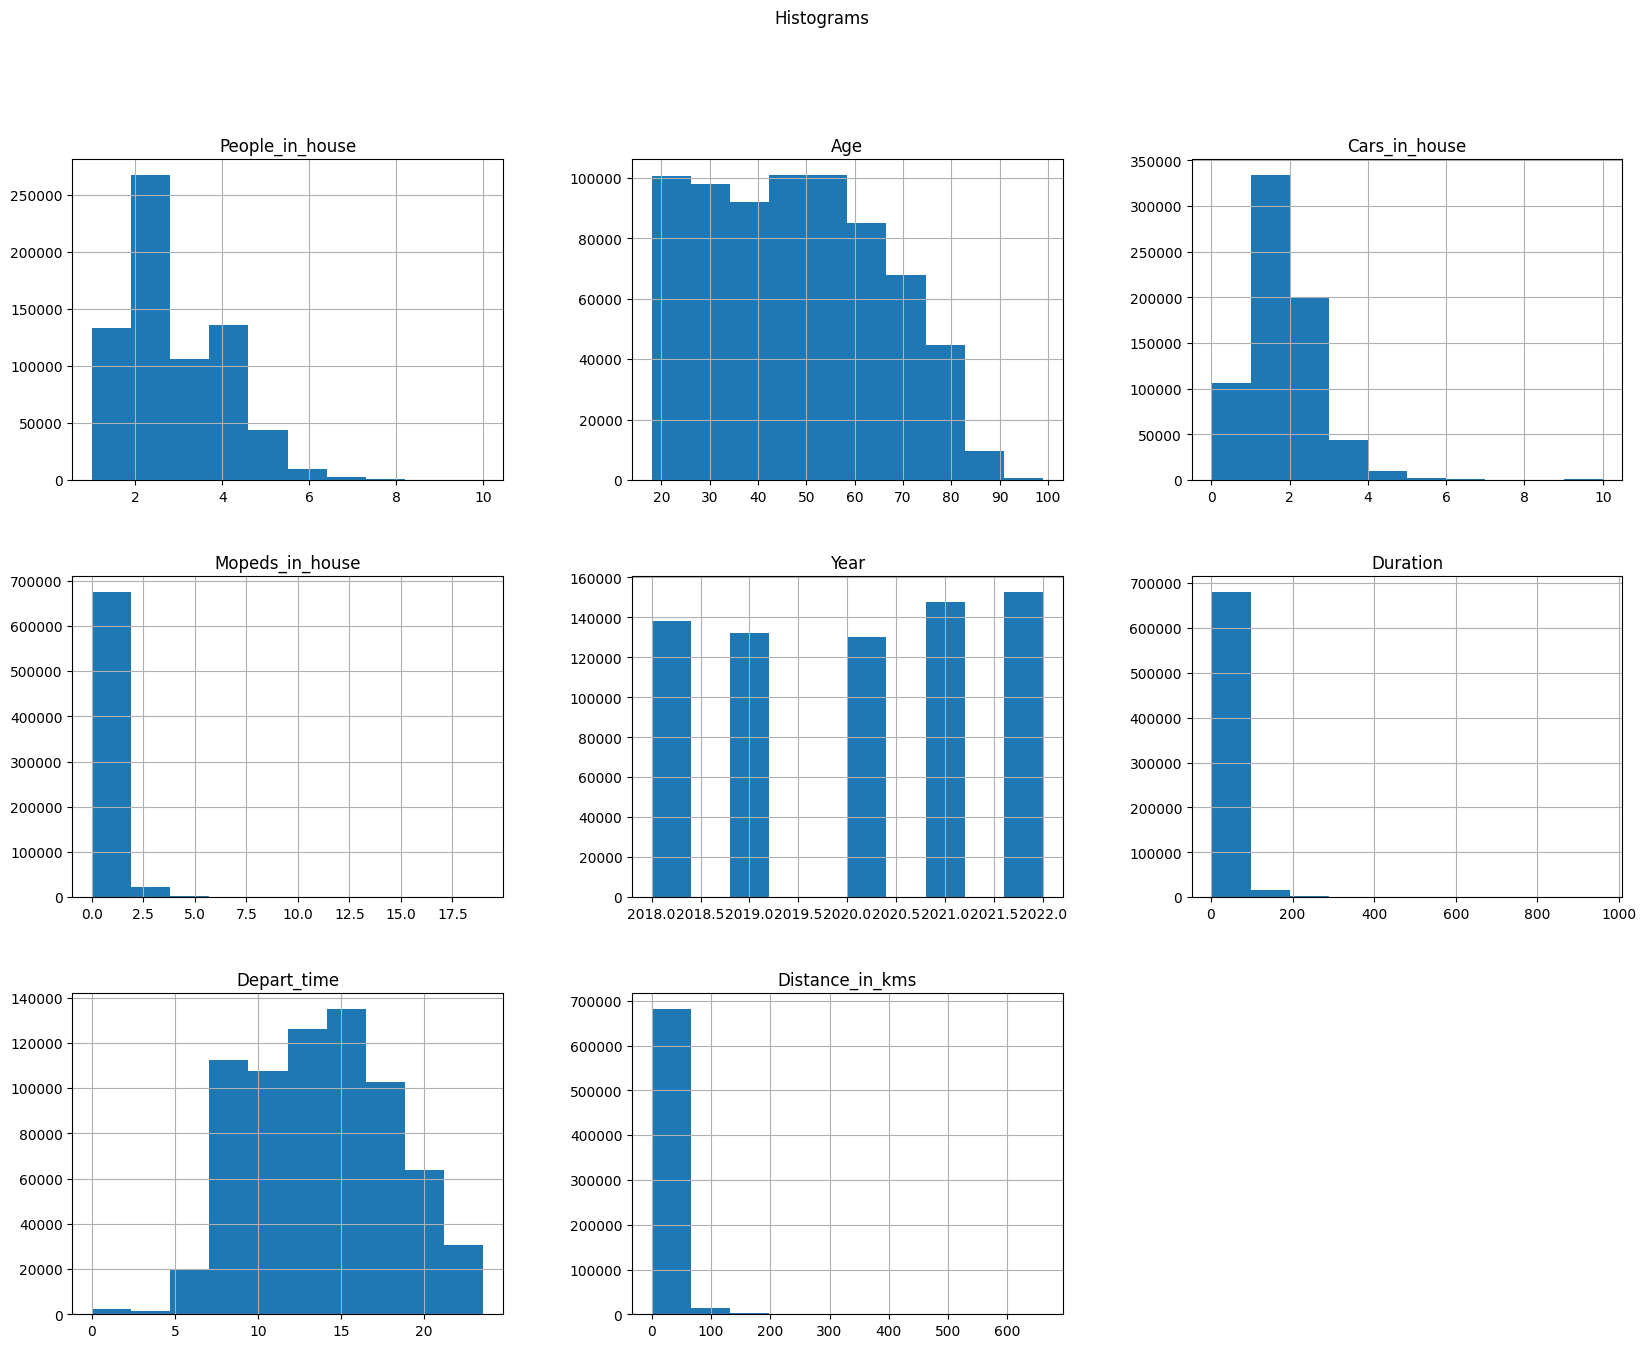

In [63]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

We see that there are outliers in Mopeds, Distance and Duration. We will drop those samples

In [64]:
df = df[(df['Duration'] <= 200)]

In [65]:
df = df[(df['Distance_in_kms'] <= 120)]

In [66]:
df = df[(df['Mopeds_in_house'] <= 5)]

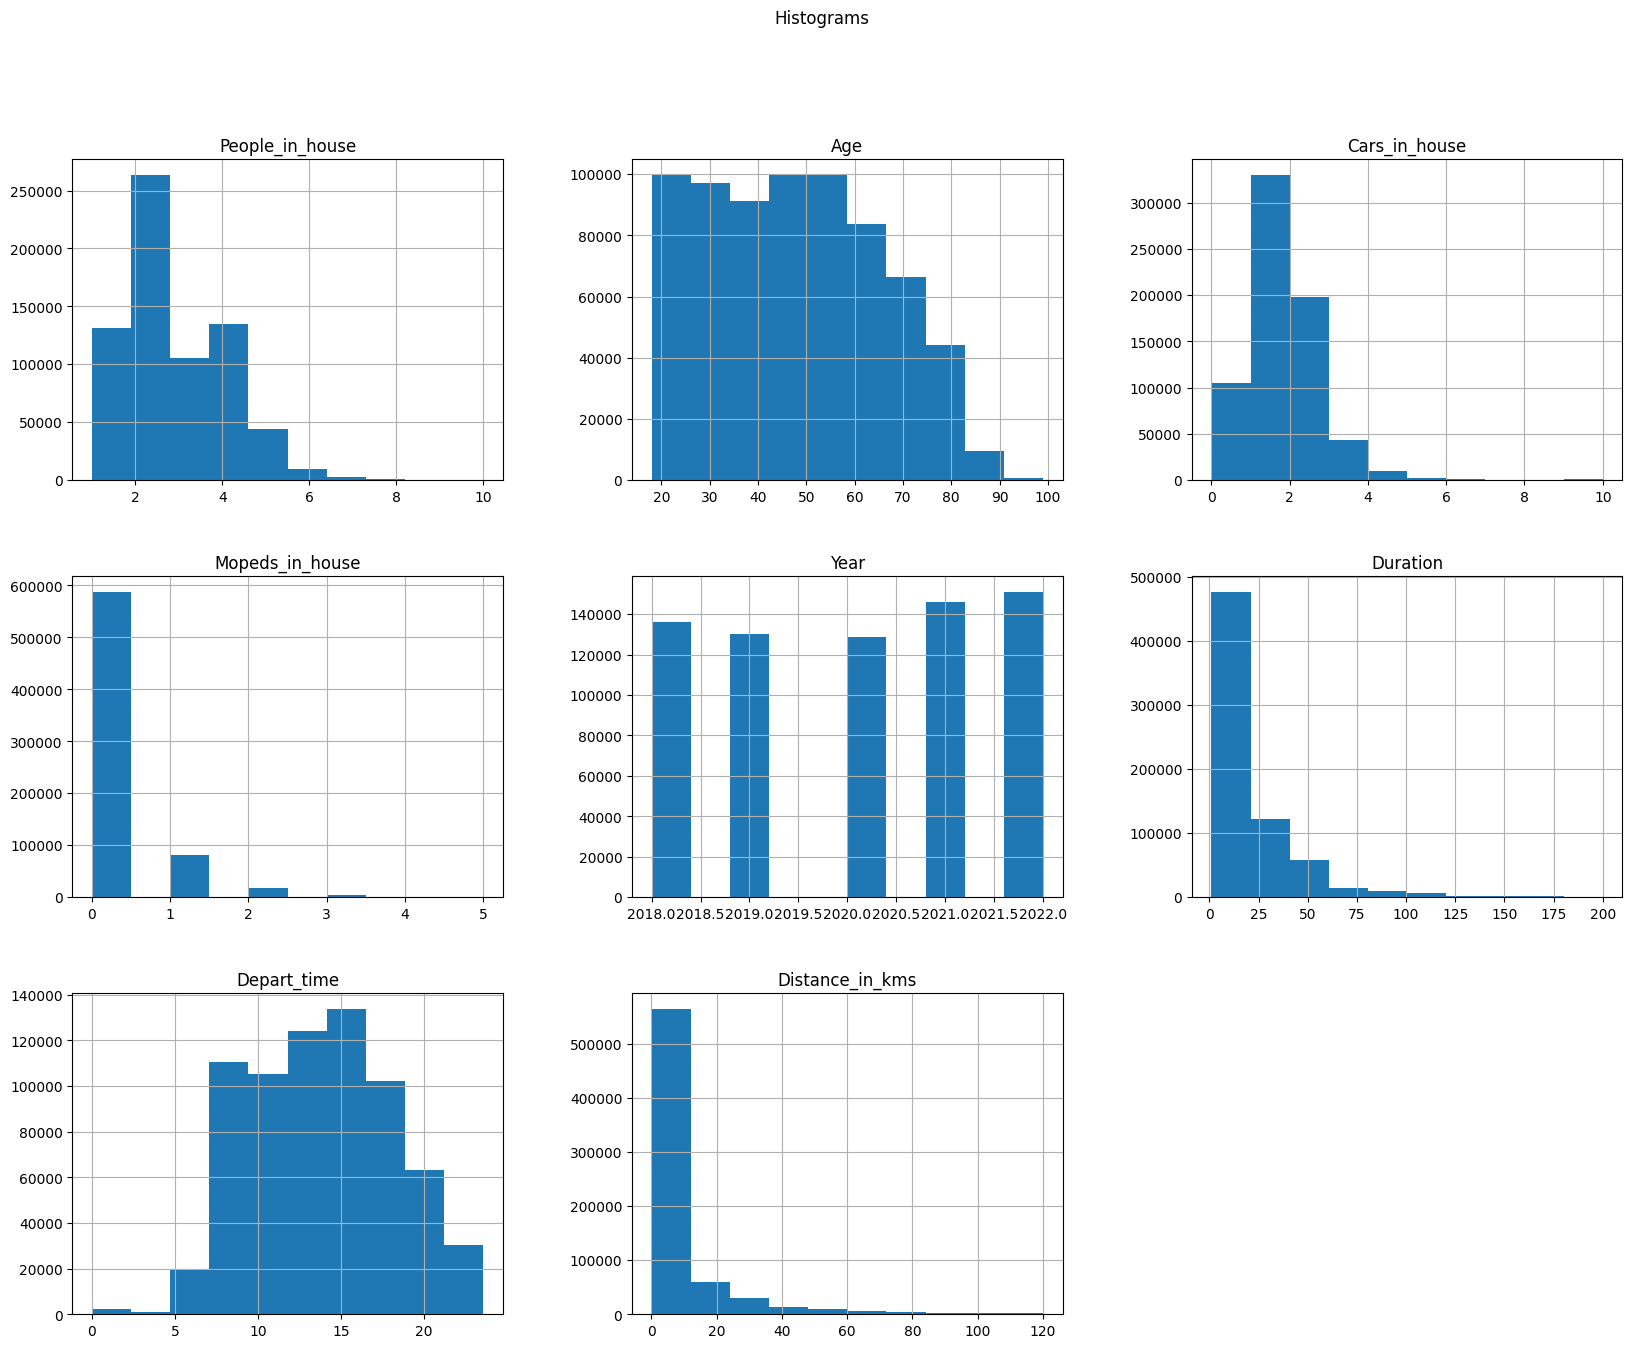

In [67]:
df.hist(bins=10, figsize=(20, 15))
plt.suptitle('Histograms') 
plt.show()

In [68]:
df.shape

(692055, 22)

In [69]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Depart_time,Distance_in_kms
count,692055.000000,692055.000000,692055.000000,692055.000000,692055.000000,692055.000000,692055.000000,692055.000000
mean,2.625118,47.582887,1.344087,0.196344,2020.066236,21.899839,13.826696,8.862933
std,1.296610,17.707843,0.982139,0.530430,1.433379,23.396404,4.263834,15.544111
min,1.000000,18.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.100000
25%,2.000000,33.000000,1.000000,0.000000,2019.000000,9.000000,10.300000,1.000000
50%,2.000000,47.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,3.000000
75%,4.000000,61.000000,2.000000,0.000000,2021.000000,30.000000,17.100000,8.500000
max,10.000000,99.000000,10.000000,5.000000,2022.000000,200.000000,23.590000,120.000000


# Explanatory Data Analysis

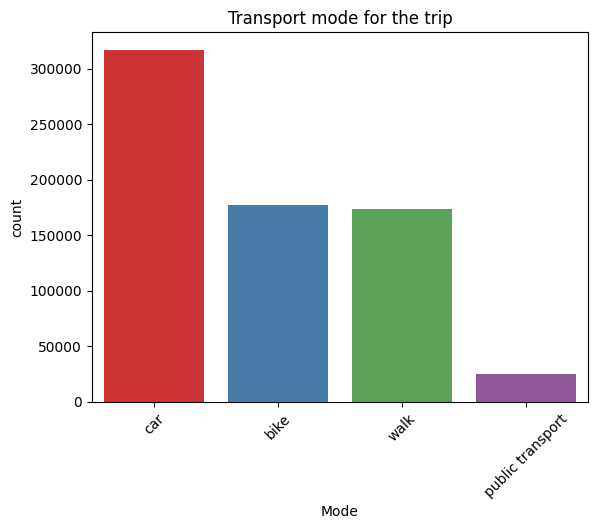

In [199]:
sns.countplot(x='Mode', data=df, palette='Set1')
plt.xticks(rotation=45)
plt.title('Transport mode for the trip')
plt.show()

In [200]:
perc=df['Mode'].value_counts(True)*100
print(perc)

Mode
car                 45.819191
bike                25.550426
walk                25.074163
public transport     3.556220
Name: proportion, dtype: float64


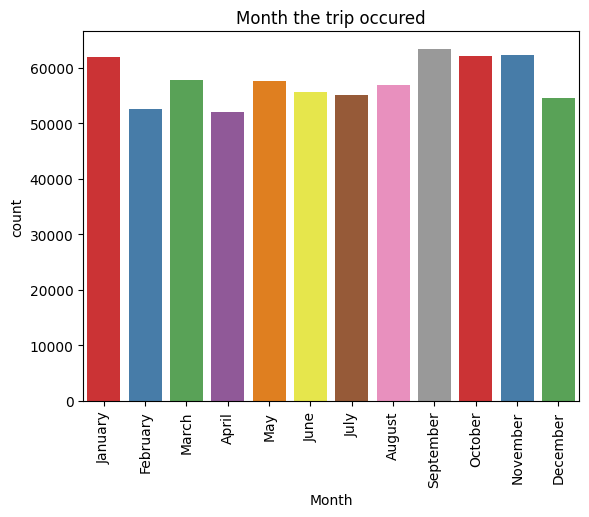

In [201]:
sns.countplot(x='Month', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Month the trip occured')
plt.show()

In [202]:
perc=df['Month'].value_counts(True)*100
print(perc)

Month
September    9.156064
November     9.007088
October      8.962438
January      8.954924
March        8.345868
May          8.323471
August       8.220589
June         8.048060
July         7.960639
December     7.889402
February     7.607632
April        7.523824
Name: proportion, dtype: float64


In [203]:
order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

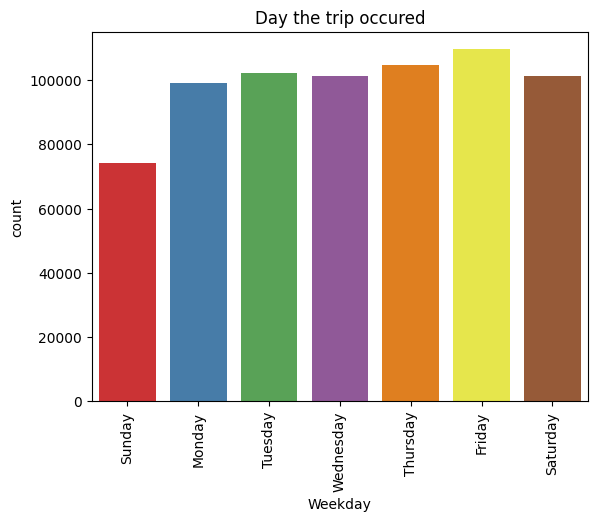

In [75]:
sns.countplot(x='Weekday', data=df, palette='Set1', order=order_day)
plt.xticks(rotation=90)
plt.title('Day the trip occured')
plt.show()

In [76]:
perc=df['Weekday'].value_counts(True)*100
print(perc)

Weekday
Friday       15.835880
Thursday     15.114984
Tuesday      14.759521
Saturday     14.623693
Wednesday    14.617046
Monday       14.335277
Sunday       10.713599
Name: proportion, dtype: float64


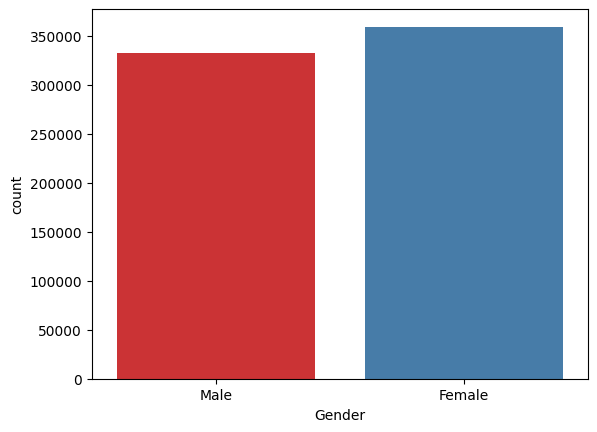

In [77]:
sns.countplot(x='Gender', data=df, palette='Set1')
plt.show()

In [78]:
perc=df['Gender'].value_counts(True)*100
print(perc)

Gender
Female    51.960177
Male      48.039823
Name: proportion, dtype: float64


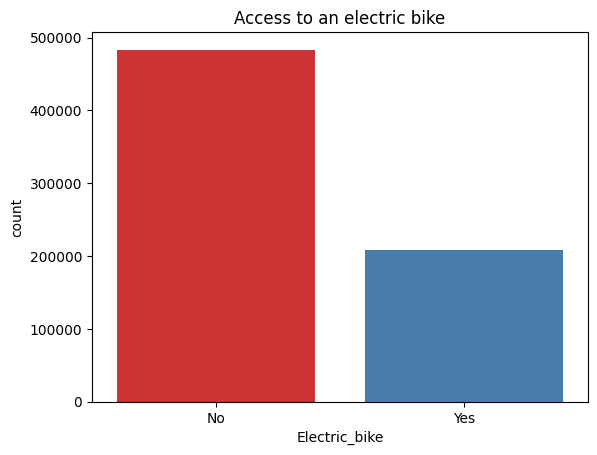

In [79]:
sns.countplot(x='Electric_bike', data=df, palette='Set1')
plt.title('Access to an electric bike')
plt.show()

In [80]:
perc=df['Electric_bike'].value_counts(True)*100
print(perc)

Electric_bike
No     69.851963
Yes    30.148037
Name: proportion, dtype: float64


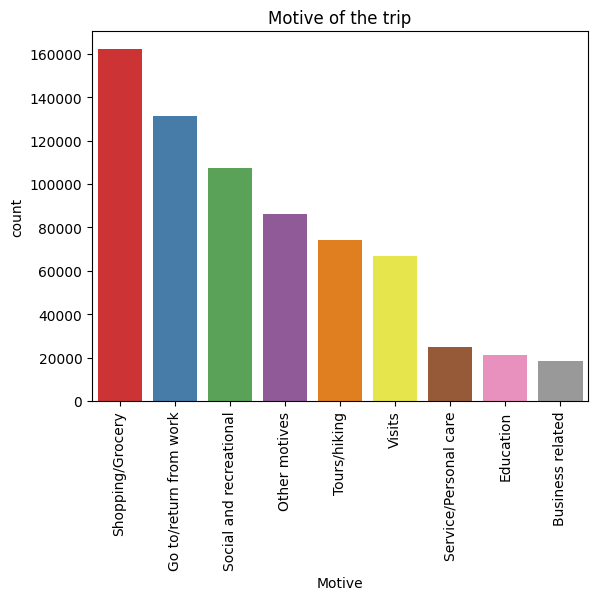

In [81]:
ordered_categories = df['Motive'].value_counts().index
sns.countplot(x='Motive', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Motive of the trip')
plt.show()

In [82]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           23.434120
Go to/return from work     18.943870
Social and recreational    15.488220
Other motives              12.418522
Tours/hiking               10.738742
Visits                      9.642442
Service/Personal care       3.577750
Education                   3.073889
Business related            2.682446
Name: proportion, dtype: float64


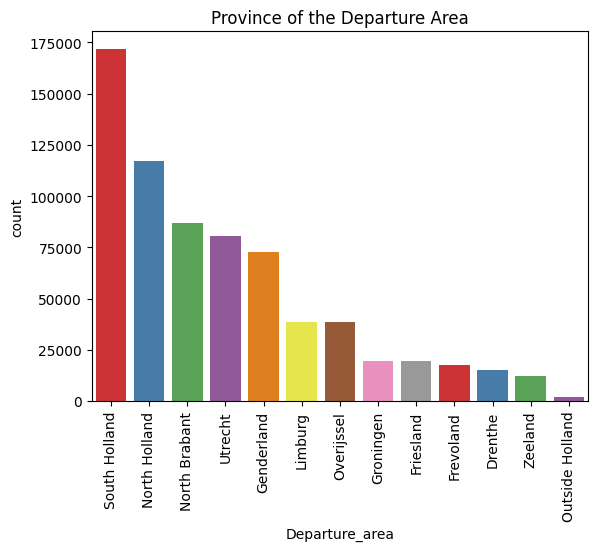

In [83]:
ordered_categories = df['Departure_area'].value_counts().index
sns.countplot(x='Departure_area', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Province of the Departure Area')
plt.show()

In [84]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.829529
North Holland      16.909205
North Brabant      12.521259
Utrecht            11.602835
Genderland         10.491507
Limburg             5.586406
Overijssel          5.576435
Groningen           2.844572
Friesland           2.813938
Frevoland           2.551531
Drenthe             2.189421
Zeeland             1.769368
Outside Holland     0.313992
Name: proportion, dtype: float64


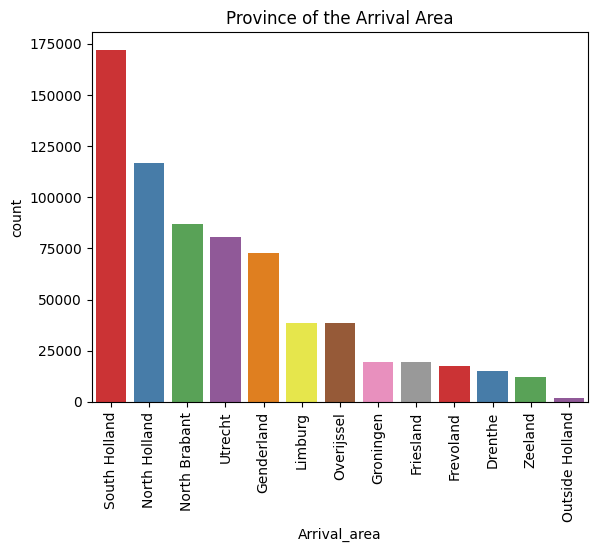

In [85]:
ordered_categories = df['Arrival_area'].value_counts().index
sns.countplot(x='Arrival_area', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Province of the Arrival Area')
plt.show()

In [86]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.861319
North Holland      16.900246
North Brabant      12.529206
Utrecht            11.612227
Genderland         10.501044
Limburg             5.589729
Overijssel          5.574557
Groningen           2.847462
Friesland           2.813360
Frevoland           2.544451
Drenthe             2.185231
Zeeland             1.766623
Outside Holland     0.274545
Name: proportion, dtype: float64


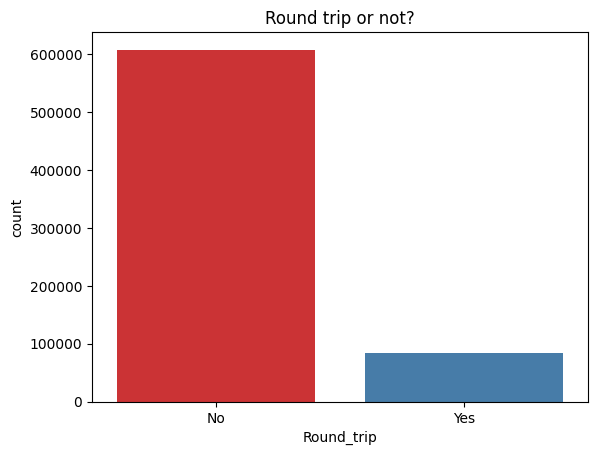

In [87]:
sns.countplot(x='Round_trip', data=df, palette='Set1')
plt.title('Round trip or not?')
plt.show()

In [88]:
perc=df['Round_trip'].value_counts(True)*100
print(perc)

Round_trip
No     87.789121
Yes    12.210879
Name: proportion, dtype: float64


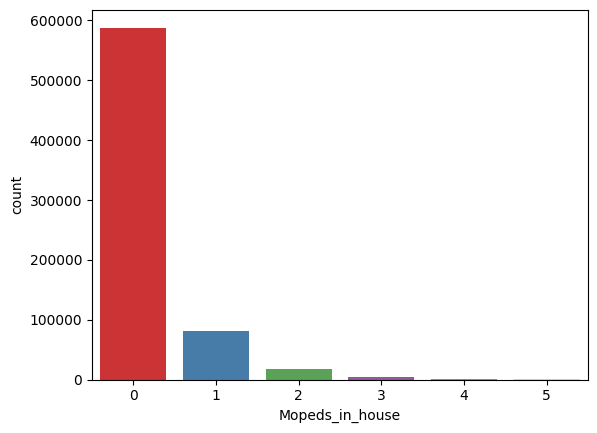

In [89]:
sns.countplot(x='Mopeds_in_house', data=df, palette='Set1')
plt.show()

In [90]:
perc=df['Mopeds_in_house'].value_counts(True)*100
print(perc)

Mopeds_in_house
0    84.968680
1    11.610204
2     2.564392
3     0.599230
4     0.189725
5     0.067769
Name: proportion, dtype: float64


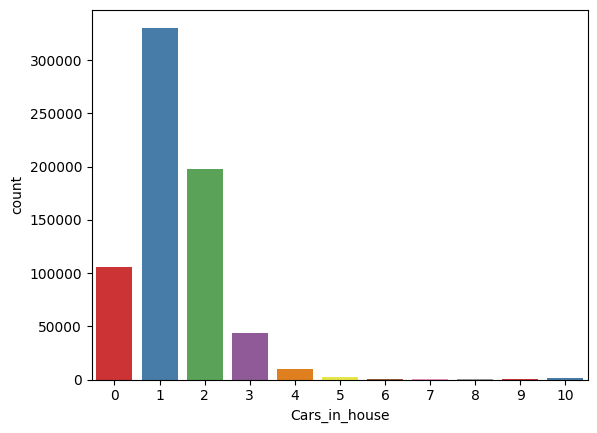

In [91]:
sns.countplot(x='Cars_in_house', data=df, palette='Set1')
plt.show()

In [92]:
perc=df['Cars_in_house'].value_counts(True)*100
print(perc)

Cars_in_house
1     47.745194
2     28.557412
0     15.213386
3      6.293719
4      1.479362
5      0.348238
10     0.172096
6      0.110540
7      0.038870
9      0.023120
8      0.018062
Name: proportion, dtype: float64


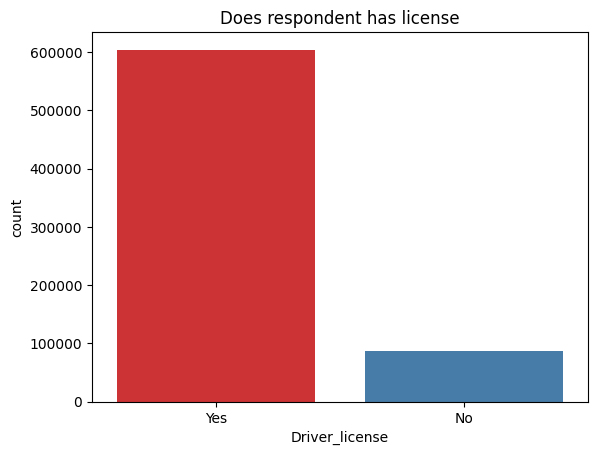

In [207]:
sns.countplot(x='Driver_license', data=df, palette='Set1')
plt.title('Does respondent has license')
plt.show()

In [208]:
perc=df['Driver_license'].value_counts(True)*100
print(perc)

Driver_license
Yes    87.334966
No     12.665034
Name: proportion, dtype: float64


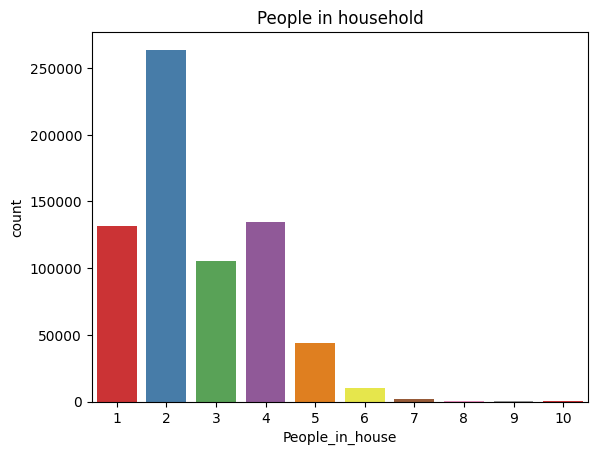

In [209]:
sns.countplot(x='People_in_house', data=df, palette='Set1')
plt.title('People in household')
plt.show()

In [96]:
perc=df['People_in_house'].value_counts(True)*100
print(perc)

People_in_house
2     38.116624
4     19.430248
1     18.995600
3     15.199514
5      6.335624
6      1.426043
7      0.333066
8      0.097680
9      0.039881
10     0.025720
Name: proportion, dtype: float64


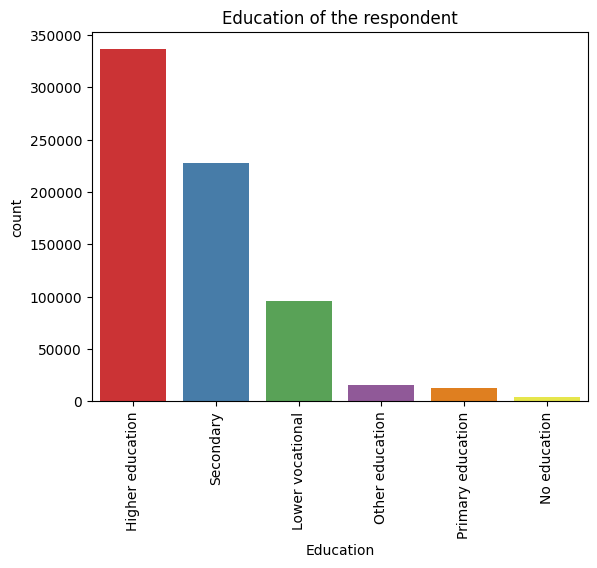

In [210]:
ordered_categories = df['Education'].value_counts().index
sns.countplot(x='Education', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Education of the respondent')
plt.show()

In [211]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.555389
Secondary            32.855626
Lower vocational     13.799192
Other education       2.335508
Primary education     1.793210
No education          0.661075
Name: proportion, dtype: float64


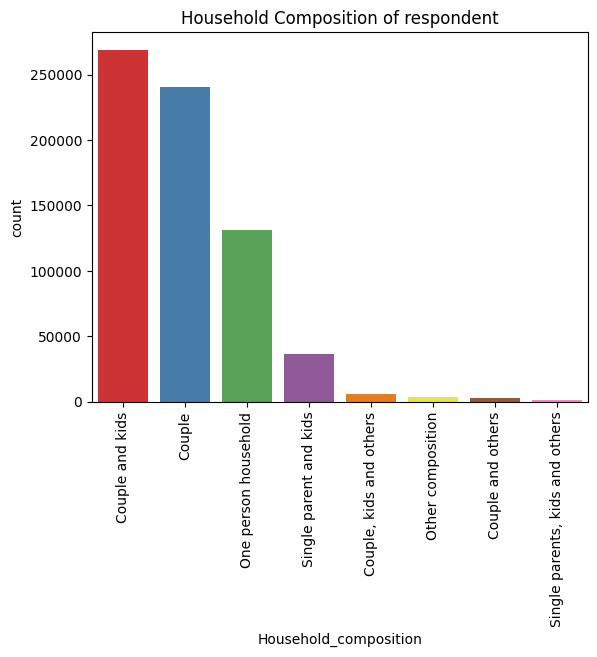

In [212]:
ordered_categories = df['Household_composition'].value_counts().index
sns.countplot(x='Household_composition', data=df, order=ordered_categories, palette='Set1')
plt.xticks(rotation=90)
plt.title('Household Composition of respondent')
plt.show()

In [100]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids                    38.857461
Couple                             34.762411
One person household               18.995600
Single parent and kids              5.278338
Couple, kids and others             0.881577
Other composition                   0.569030
Couple and others                   0.466437
Single parents, kids and others     0.189147
Name: proportion, dtype: float64


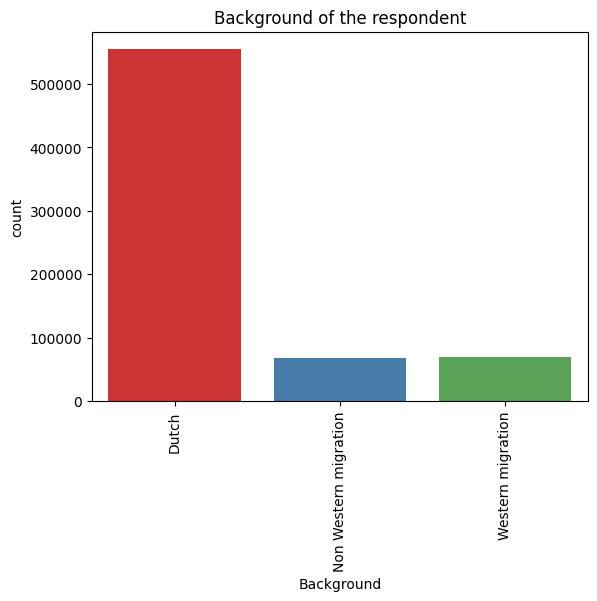

In [213]:
sns.countplot(x='Background', data=df, palette='Set1')
plt.xticks(rotation=90)
plt.title('Background of the respondent')
plt.show()

In [102]:
perc=df['Background'].value_counts(True)*100
print(perc)

Background
Dutch                    80.138428
Western migration        10.012932
Non Western migration     9.848639
Name: proportion, dtype: float64


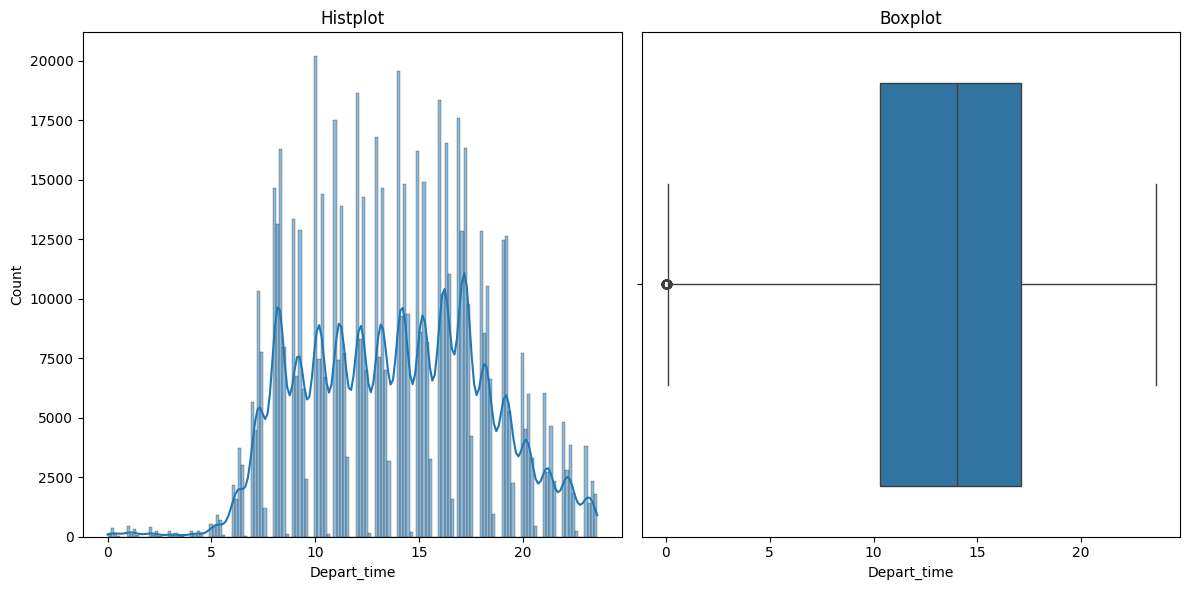

In [70]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Depart_time', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Depart_time', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

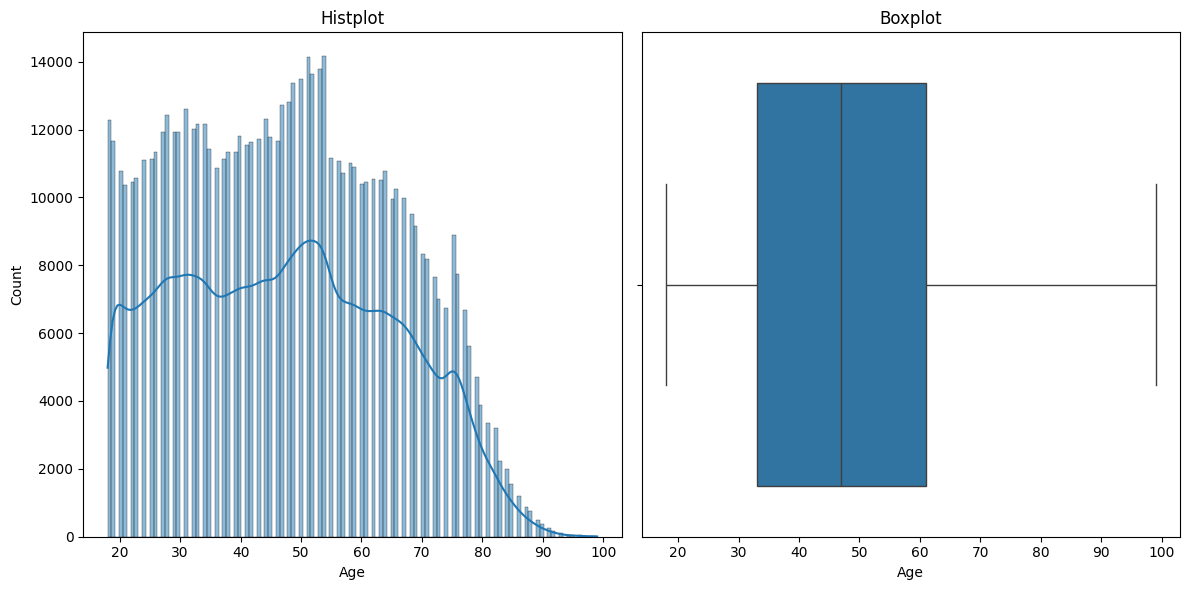

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Age', kde=True, ax=axes[0])
axes[0].set_title('Histplot')

sns.boxplot(x='Age', data=df, ax=axes[1])
axes[1].set_title('Boxplot')

plt.tight_layout()

plt.show()

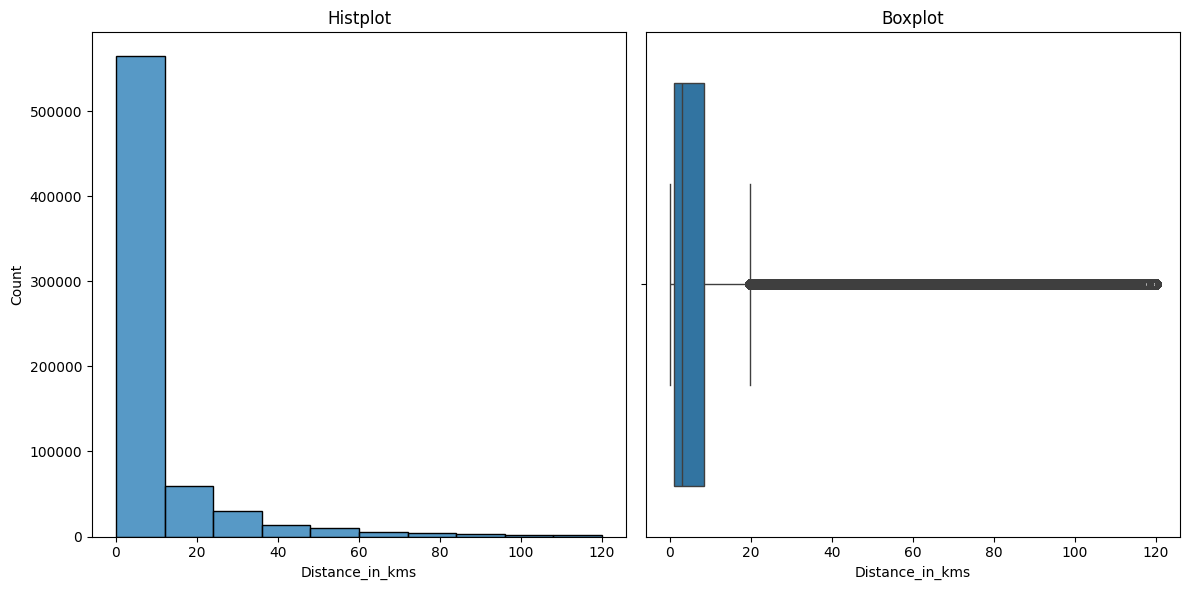

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

sns.histplot(data=df, x='Distance_in_kms', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Distance_in_kms', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

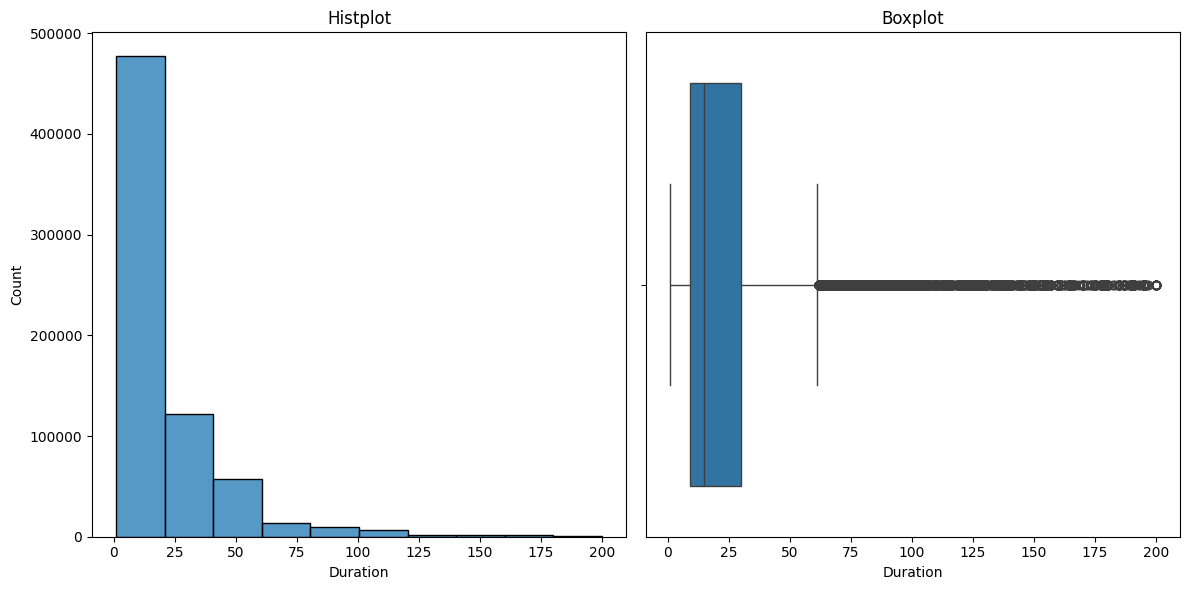

In [106]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Duration', ax=axes[0], bins=10)
axes[0].set_title('Histplot')

sns.boxplot(x='Duration', data=df, ax=axes[1])
axes[1].set_title('Boxplot')
plt.tight_layout()
plt.show()

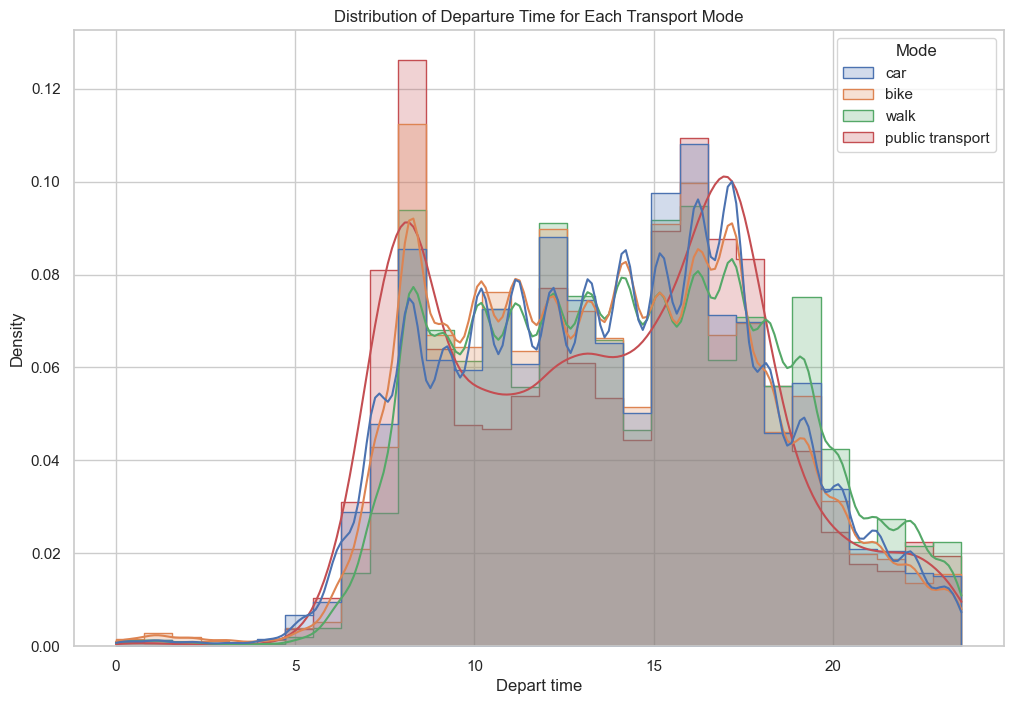

In [108]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Depart_time', hue='Mode', bins=30, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Departure Time for Each Transport Mode')
plt.xlabel('Depart time')
plt.ylabel('Density')
plt.show()

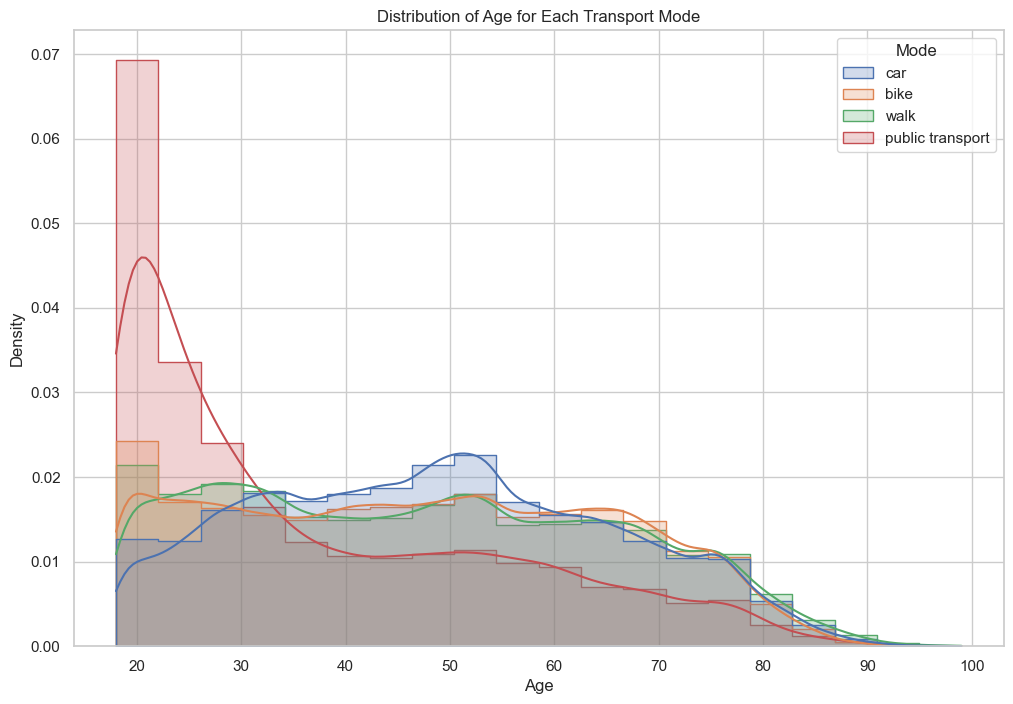

In [80]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Mode', bins=20, kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribution of Age for Each Transport Mode')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

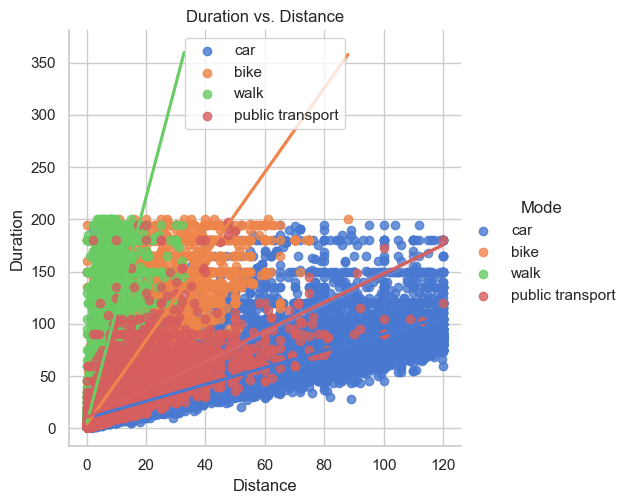

In [105]:
sns.lmplot(data=df, x='Distance_in_kms', y='Duration', hue='Mode', palette='muted')
plt.xlabel('Distance')
plt.ylabel('Duration')
plt.title('Duration vs. Distance')
plt.legend()
plt.show()

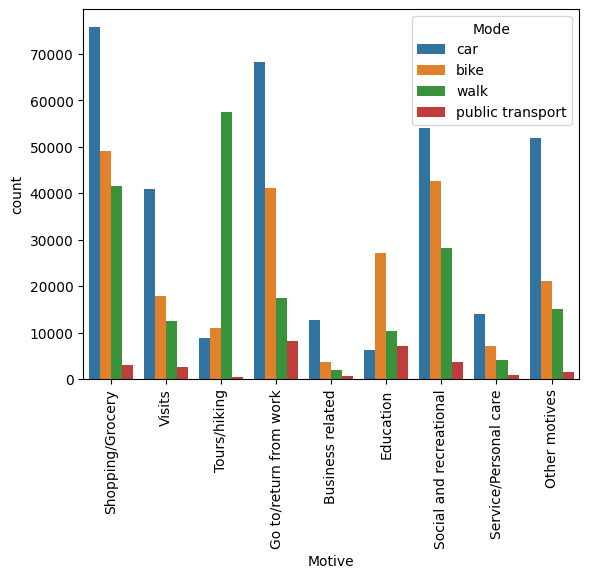

In [301]:
sns.countplot(x='Motive', data=df, hue="Mode")
plt.xticks(rotation=90)
plt.show()

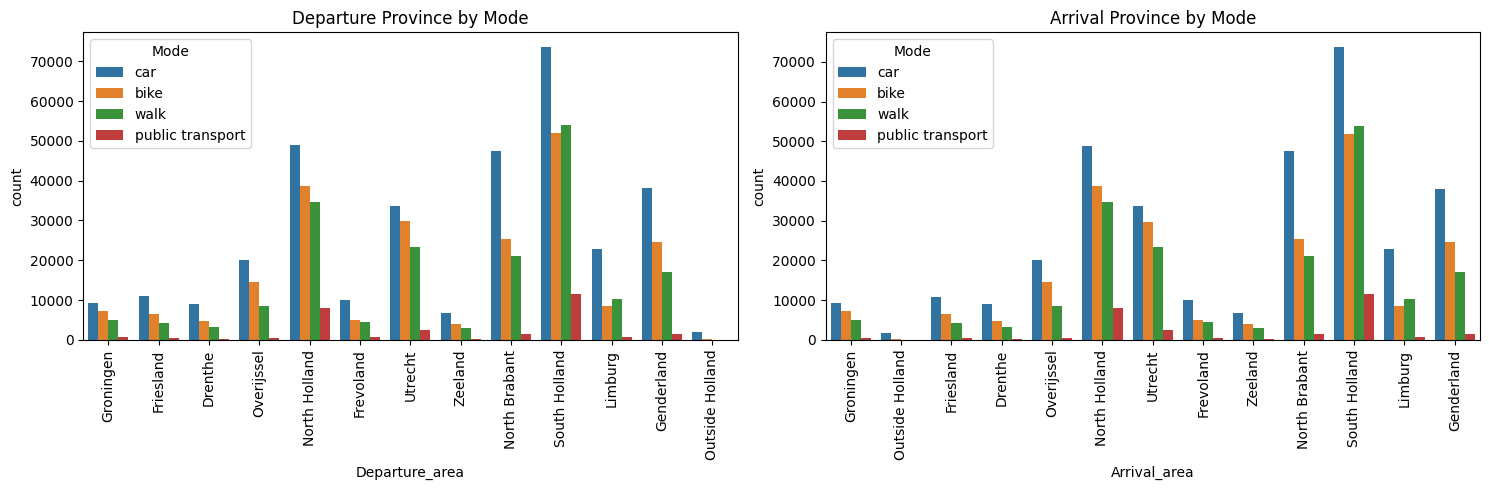

In [302]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

countplots = [
    (sns.countplot(x='Departure_area', data=df, hue="Mode", ax=axes[0]), 'Departure Province by Mode'),
    (sns.countplot(x='Arrival_area', data=df, hue="Mode", ax=axes[1]), 'Arrival Province by Mode'),
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

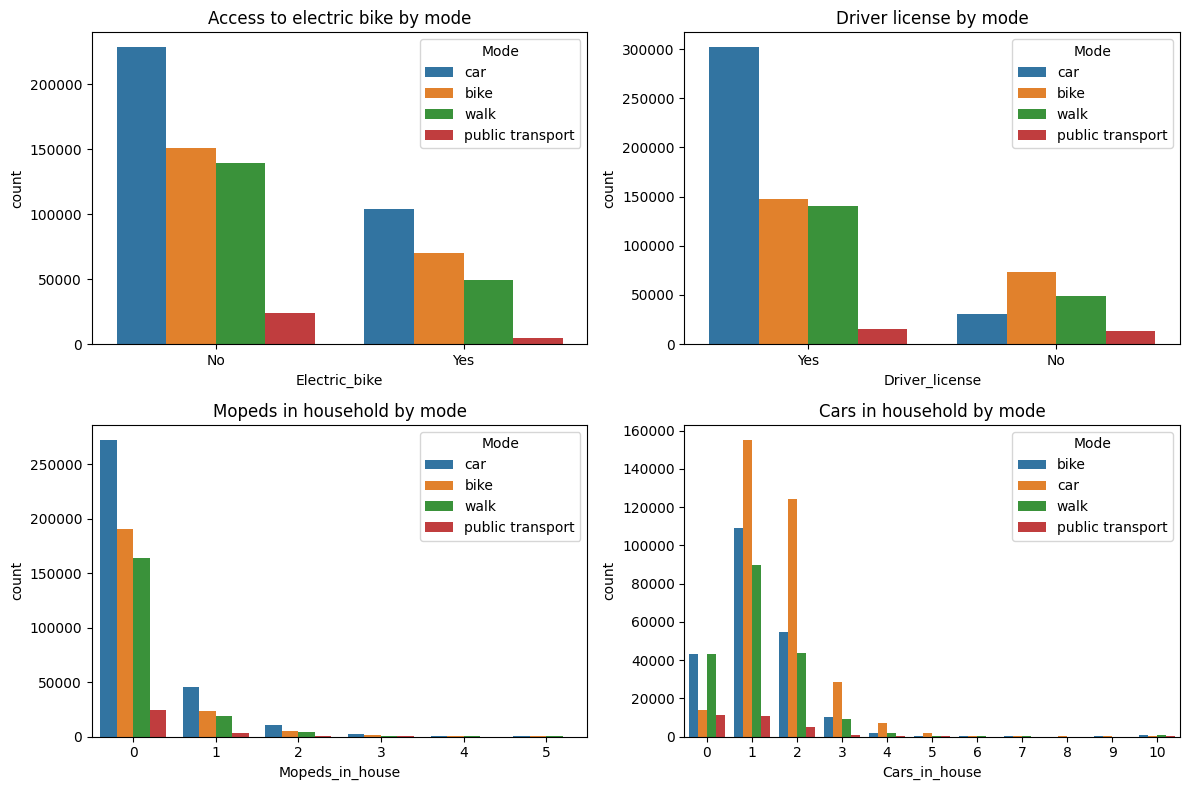

In [303]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Electric_bike', data=df, hue="Mode", ax=axes[0, 0]), 'Access to electric bike by mode'),
    (sns.countplot(x='Driver_license', data=df, hue="Mode", ax=axes[0, 1]), 'Driver license by mode'),
    (sns.countplot(x='Mopeds_in_house', data=df, hue="Mode", ax=axes[1, 0]), 'Mopeds in household by mode'),
    (sns.countplot(x='Cars_in_house', data=df, hue="Mode", ax=axes[1, 1]), 'Cars in household by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=0)

plt.tight_layout()

plt.show()

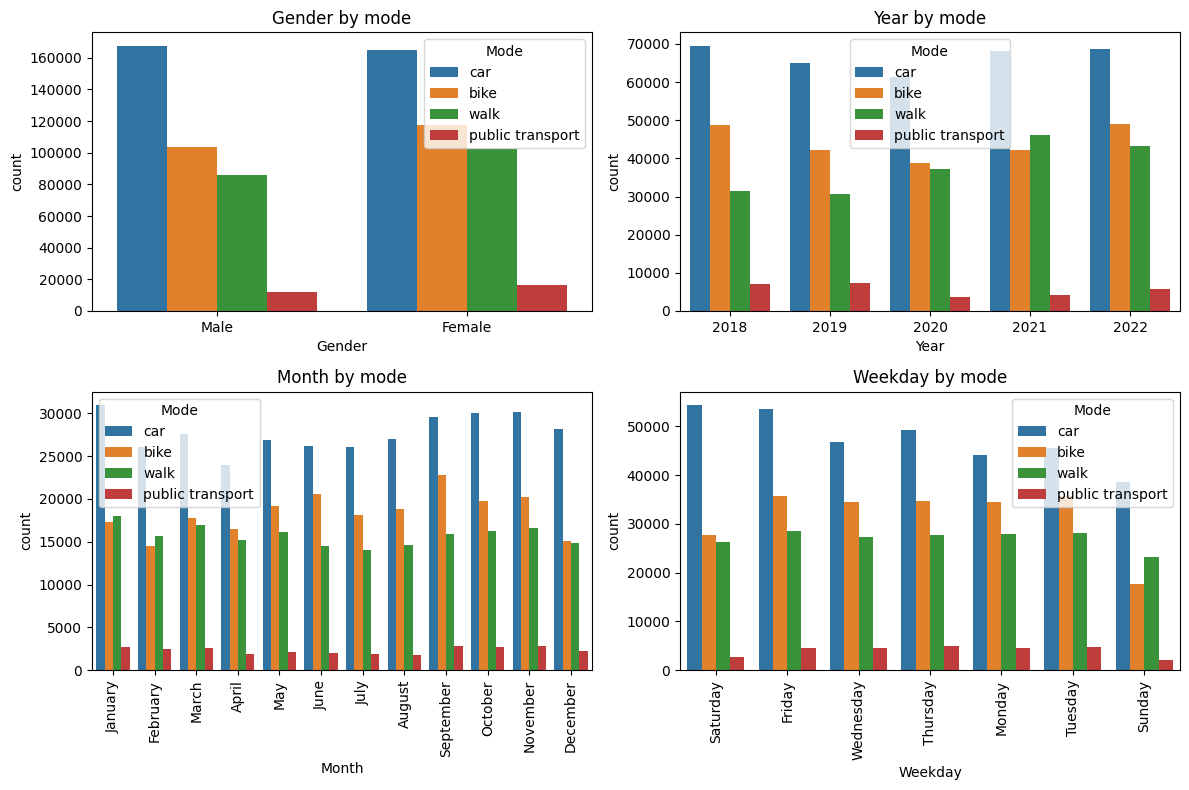

In [304]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

countplots = [
    (sns.countplot(x='Gender', data=df, hue="Mode", ax=axes[0, 0]), 'Gender by mode'),
    (sns.countplot(x='Year', data=df, hue="Mode", ax=axes[0, 1]), 'Year by mode'),
    (sns.countplot(x='Month', data=df, hue="Mode", ax=axes[1, 0]), 'Month by mode'),
    (sns.countplot(x='Weekday', data=df, hue="Mode", ax=axes[1, 1]), 'Weekday by mode')
]

for plot, title in countplots:
    plot.set_title(title)
    if title in ['Month by mode', 'Weekday by mode']:
        plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

plt.tight_layout()

plt.show()

# DATA PREPROCESS

In [107]:
df.describe()

,People_in_house,Age,Cars_in_house,Mopeds_in_house,Year,Duration,Depart_time,Distance_in_kms
count,692055.000000,692055.000000,692055.000000,692055.000000,692055.000000,692055.000000,692055.000000,692055.000000
mean,2.625118,47.582887,1.344087,0.196344,2020.066236,21.899839,13.826696,8.862933
std,1.296610,17.707843,0.982139,0.530430,1.433379,23.396404,4.263834,15.544111
min,1.000000,18.000000,0.000000,0.000000,2018.000000,1.000000,0.000000,0.100000
25%,2.000000,33.000000,1.000000,0.000000,2019.000000,9.000000,10.300000,1.000000
50%,2.000000,47.000000,1.000000,0.000000,2020.000000,15.000000,14.000000,3.000000
75%,4.000000,61.000000,2.000000,0.000000,2021.000000,30.000000,17.100000,8.500000
max,10.000000,99.000000,10.000000,5.000000,2022.000000,200.000000,23.590000,120.000000


In [108]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids                    38.857461
Couple                             34.762411
One person household               18.995600
Single parent and kids              5.278338
Couple, kids and others             0.881577
Other composition                   0.569030
Couple and others                   0.466437
Single parents, kids and others     0.189147
Name: proportion, dtype: float64


In [109]:
value_mapping = {
                 "Single parent and kids":"Other",
                 "Couple, kids and others":"Other",
                 "Other composition":"Other",
                 "Couple and others":"Other",
                 "Single parents, kids and others":"Other"
                }
df['Household_composition'] = df['Household_composition'].replace(value_mapping)

In [110]:
perc=df['Household_composition'].value_counts(True)*100
print(perc)

Household_composition
Couple and kids         38.857461
Couple                  34.762411
One person household    18.995600
Other                    7.384529
Name: proportion, dtype: float64


In [111]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland      24.829529
North Holland      16.909205
North Brabant      12.521259
Utrecht            11.602835
Genderland         10.491507
Limburg             5.586406
Overijssel          5.576435
Groningen           2.844572
Friesland           2.813938
Frevoland           2.551531
Drenthe             2.189421
Zeeland             1.769368
Outside Holland     0.313992
Name: proportion, dtype: float64


In [112]:
value_mapping = {
                 "Limburg":"Other",
                 "Overijssel":"Other",
                 "Groningen":"Other",
                 "Friesland":"Other",
                 "Frevoland":"Other",
                 "Drenthe":"Other",
                 "Zeeland":"Other",
                 "Outside Holland":"Other"
                }
df['Departure_area'] = df['Departure_area'].replace(value_mapping)

In [113]:
perc=df['Departure_area'].value_counts(True)*100
print(perc)

Departure_area
South Holland    24.829529
Other            23.645664
North Holland    16.909205
North Brabant    12.521259
Utrecht          11.602835
Genderland       10.491507
Name: proportion, dtype: float64


In [114]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland      24.861319
North Holland      16.900246
North Brabant      12.529206
Utrecht            11.612227
Genderland         10.501044
Limburg             5.589729
Overijssel          5.574557
Groningen           2.847462
Friesland           2.813360
Frevoland           2.544451
Drenthe             2.185231
Zeeland             1.766623
Outside Holland     0.274545
Name: proportion, dtype: float64


In [115]:
value_mapping = {
                 "Limburg":"Other",
                 "Overijssel":"Other",
                 "Groningen":"Other",
                 "Friesland":"Other",
                 "Frevoland":"Other",
                 "Drenthe":"Other",
                 "Zeeland":"Other",
                 "Outside Holland":"Other"
                }
df['Arrival_area'] = df['Arrival_area'].replace(value_mapping)

In [116]:
perc=df['Arrival_area'].value_counts(True)*100
print(perc)

Arrival_area
South Holland    24.861319
Other            23.595957
North Holland    16.900246
North Brabant    12.529206
Utrecht          11.612227
Genderland       10.501044
Name: proportion, dtype: float64


In [117]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education     48.555389
Secondary            32.855626
Lower vocational     13.799192
Other education       2.335508
Primary education     1.793210
No education          0.661075
Name: proportion, dtype: float64


In [118]:
value_mapping = {
                 "Other education":"Other",
                 "Primary education":"Other",
                 "No education":"Other",
                 "Lower vocational":"Other",
                }
df['Education'] = df['Education'].replace(value_mapping)

In [119]:
perc=df['Education'].value_counts(True)*100
print(perc)

Education
Higher education    48.555389
Secondary           32.855626
Other               18.588985
Name: proportion, dtype: float64


In [120]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           23.434120
Go to/return from work     18.943870
Social and recreational    15.488220
Other motives              12.418522
Tours/hiking               10.738742
Visits                      9.642442
Service/Personal care       3.577750
Education                   3.073889
Business related            2.682446
Name: proportion, dtype: float64


In [121]:
value_mapping = {
                 "Service/Personal care":"Other",
                 "Education":"Other",
                 "Business related":"Other",
                 "Other motives":"Other"
                }
df['Motive'] = df['Motive'].replace(value_mapping)

In [122]:
perc=df['Motive'].value_counts(True)*100
print(perc)

Motive
Shopping/Grocery           23.434120
Other                      21.752606
Go to/return from work     18.943870
Social and recreational    15.488220
Tours/hiking               10.738742
Visits                      9.642442
Name: proportion, dtype: float64


In [123]:
one_hot_encoded = pd.get_dummies(df[['Departure_area', 'Background', 'Motive', 'Household_composition', 'Education']])

one_hot_encoded = one_hot_encoded.astype(int)

df = pd.concat([df, one_hot_encoded], axis=1)

df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,0,0,0,1,0,0,0,1
1,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,0,0,0,1,0,0,0,1
2,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,1,0,0,1,0,0,0,1
3,1,One person household,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,1,0,0,1,0,0,0,1
4,2,Couple,Male,42,Dutch,Secondary,Yes,1,0,No,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Other,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,0,0,0,0,0,0,1,1,0,0
817122,3,Other,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,0,0,0,0,0,0,1,1,0,0
817123,3,Other,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,0,0,0,0,0,0,1,1,0,0
817124,3,Other,Female,49,Non Western migration,Higher education,Yes,1,0,No,...,1,0,0,0,0,0,1,1,0,0


In [124]:
le=LabelEncoder()
features=["Gender","Electric_bike", "Driver_license", "Round_trip", "Arrival_area", "Holiday",]
for col in features:
    df[col]=le.fit_transform(df[col])

In [125]:
value_mapping = {"car":0, "bike":1, "walk":2, "public transport":3}
df['Mode'] = df['Mode'].replace(value_mapping)

In [126]:
value_mapping = {"Monday":1, "Tuesday":2, "Wednesday":3, "Thursday":4, "Friday":5, "Saturday":6, "Sunday":7}
df['Weekday'] = df['Weekday'].replace(value_mapping)

In [127]:
value_mapping = {"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}
df['Month'] = df['Month'].replace(value_mapping)

In [128]:
df

,People_in_house,Household_composition,Gender,Age,Background,Education,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,One person household,1,42,Dutch,Secondary,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
4,2,Couple,1,42,Dutch,Secondary,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
817122,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
817123,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,0,0,0,0,0,0,1,1,0,0
817124,3,Other,0,49,Non Western migration,Higher education,1,1,0,0,...,1,0,0,0,0,0,1,1,0,0


In [129]:
df.isnull().any()

People_in_house                               False
Household_composition                         False
Gender                                        False
Age                                           False
Background                                    False
Education                                     False
Driver_license                                False
Cars_in_house                                 False
Mopeds_in_house                               False
Electric_bike                                 False
Year                                          False
Month                                         False
Weekday                                       False
Holiday                                       False
Round_trip                                    False
Motive                                        False
Departure_area                                False
Arrival_area                                  False
Duration                                      False
Mode        

In [130]:
drops = ['Departure_area', 'Background', 'Motive', 'Household_composition', 'Education']
df = df.drop(drops, axis=1)
df

,People_in_house,Gender,Age,Driver_license,Cars_in_house,Mopeds_in_house,Electric_bike,Year,Month,Weekday,...,Motive_Social and recreational,Motive_Tours/hiking,Motive_Visits,Household_composition_Couple,Household_composition_Couple and kids,Household_composition_One person household,Household_composition_Other,Education_Higher education,Education_Other,Education_Secondary
0,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
1,1,1,42,1,1,0,0,2018,1,6,...,0,0,0,0,0,1,0,0,0,1
2,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
3,1,1,42,1,1,0,0,2018,1,6,...,0,0,1,0,0,1,0,0,0,1
4,2,1,42,1,1,0,0,2018,1,5,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817121,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
817122,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
817123,3,0,49,1,1,0,0,2022,12,4,...,0,0,0,0,0,0,1,1,0,0
817124,3,0,49,1,1,0,0,2022,12,4,...,1,0,0,0,0,0,1,1,0,0
